In [1]:
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from rubin_scheduler.scheduler.utils import EuclidOverlapFootprint

In [2]:
nside = 64
sky = EuclidOverlapFootprint(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()

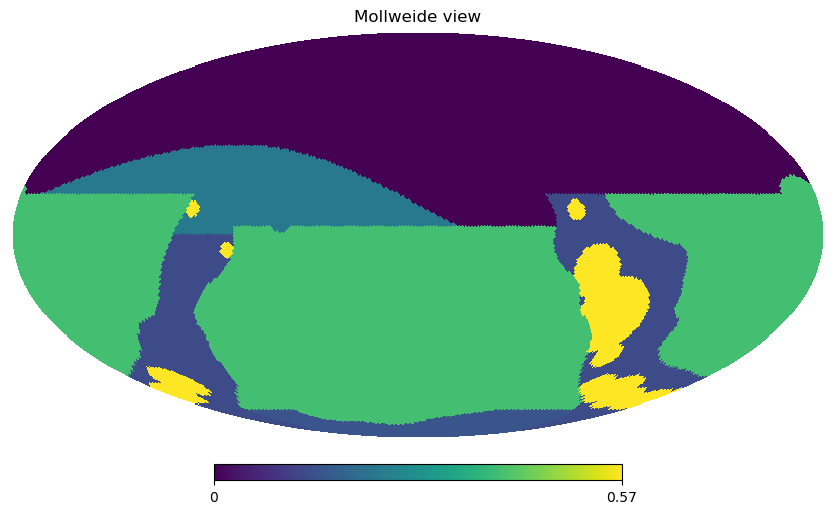

In [3]:
hp.mollview(footprints_hp_array['g'])

In [4]:
ack, sm, lables = sky.estimate_visits(2.1e6)

In [9]:
np.size(np.where(labels == 'bulgy')[0])

1824

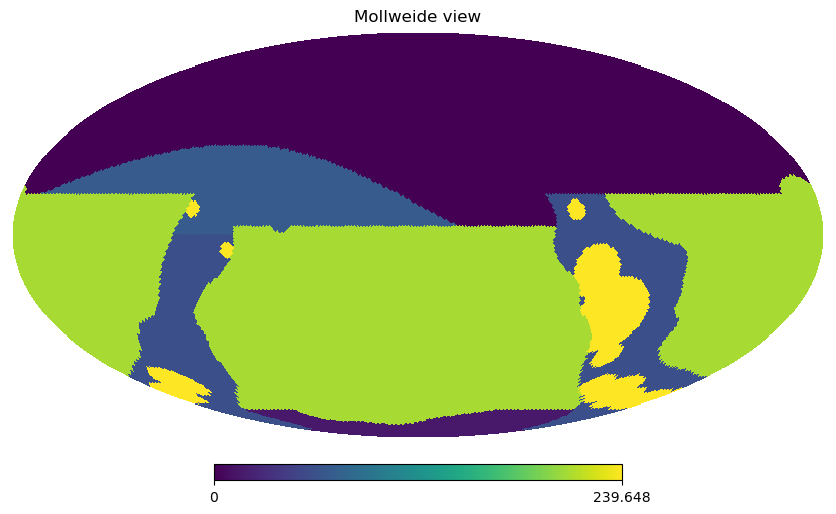

In [5]:
hp.mollview(ack['r'])

 0.0
LMC_SMC 941.9188840939021
bulgy 898.1571660275922
dusty_plane 247.9830690424211
euclid_overlap 941.9188840939021
lowdust 941.9188840939021
nes 233.3958296869846
scp 125.03348018945601
virgo 941.9188840939021
24020198.550327092


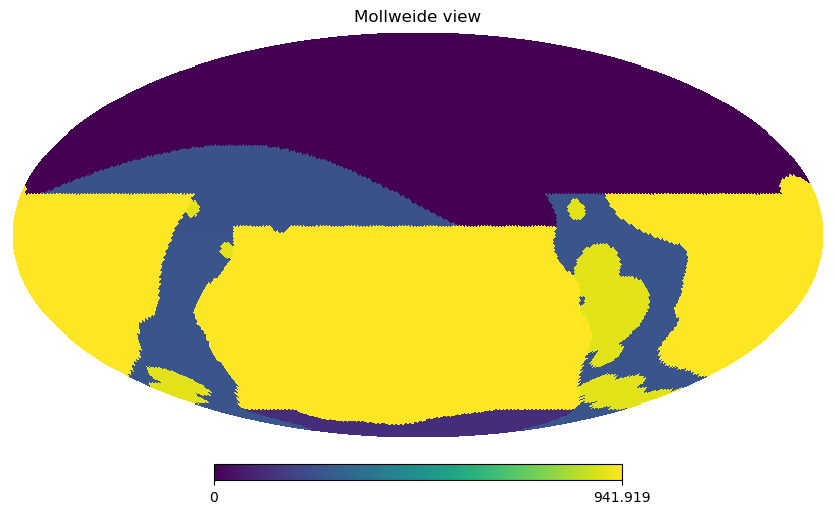

In [6]:
all_bands = 0
for key in ack.dtype.names:
    all_bands += ack[key]
hp.mollview(all_bands)


for lab in np.unique(labels):
    good = np.where(labels == lab)[0][0]
    print(lab, all_bands[good])

print(all_bands.sum())

In [7]:
good = np.where(all_bands > 0)
np.median(all_bands[good])

941.9188840939021

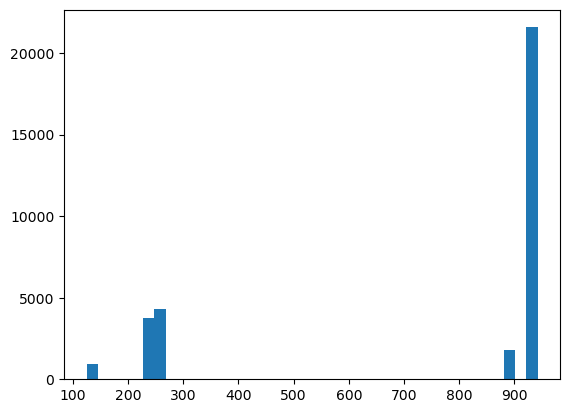

In [8]:
_temp = plt.hist(all_bands[good], bins=40)